In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division, print_function, unicode_literals

Dự đoán pass / fail dựa trên giờ học

In [148]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [149]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [150]:
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [151]:
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [152]:
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)

In [153]:
print(w[-1])


[[-4.12992081]
 [ 1.50175786]]


 => y = sigmoid(-4.1 + 1.55*x)

In [154]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03295692 0.04726339 0.06734775 0.0951148  0.13270115 0.18215058
  0.18215058 0.24482514 0.32061093 0.40720639 0.49997833 0.59275176
  0.6793513  0.7551428  0.8672789  0.90487027 0.93264136 0.9527288
  0.96703756 0.98416775]]


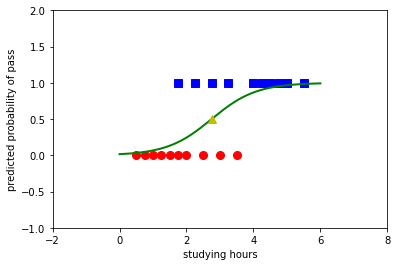

In [155]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

=> có thể thấy nếu học từ 4 tiếng trở lên thì khả năng đậu cao hơn, còn học dưới 2 tiếng thì khả năng rớt cao hơn

Exercise : Dự đoán cho vay 

In [156]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')

In [157]:
data.shape

(20, 3)

In [158]:
data

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [159]:
data = data.values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

Text(0, 0.5, 'kinh nghiệm (năm)')

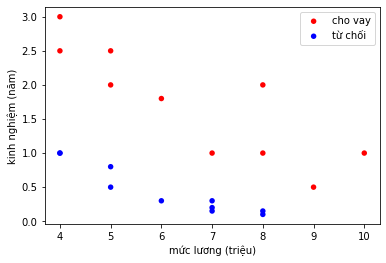

In [160]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [161]:
X = np.hstack((np.ones((N, 1)), x))

In [162]:
w = np.array([0.,0.1,0.1]).reshape(-1,1)


In [163]:
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01

for i in range(1, numOfIteration):
    
	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(X, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(X.T, y_predict-y)	 
    print(cost[i])

[14.3783222]
[14.37536009]
[14.52617153]
[14.51426849]
[14.61633124]
[14.45526156]
[14.40335079]
[14.14832828]
[13.97986699]
[13.71835467]
[13.48635327]
[13.25428121]
[12.99278425]
[12.79528802]
[12.52560943]
[12.35759173]
[12.09391963]
[11.94844506]
[11.70025271]
[11.57135333]
[11.34455593]
[11.22796382]
[11.02570355]
[10.91881102]
[10.74211332]
[10.64364326]
[10.49198407]
[10.40156765]
[10.27334863]
[10.19110203]
[10.08403294]
[10.01018498]
[9.92158252]
[9.85619039]
[9.78321018]
[9.72599049]
[9.66581037]
[9.61609685]
[9.56606508]
[9.52287899]
[9.48063066]
[9.44282419]
[9.40636077]
[9.37277831]
[9.34050283]
[9.31011155]
[9.28081799]
[9.252781]
[9.22560668]
[9.19929876]
[9.1736558]
[9.14863912]
[9.12414184]
[9.10012349]
[9.07652441]
[9.05331276]
[9.03045303]
[9.007922]
[8.98569682]
[8.96376049]
[8.94209698]
[8.92069328]
[8.8995372]
[8.87861825]
[8.85792654]
[8.83745323]
[8.81718992]
[8.79712892]
[8.77726292]
[8.7575851]
[8.73808899]
[8.71876849]
[8.69961781]
[8.68063146]
[8.66180423]
[

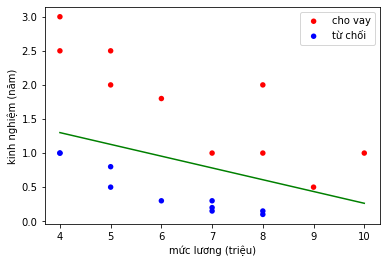

In [164]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

Diabetes Data 

Download file here https://1drv.ms/x/s!AtqQEFO2GBQugrpYAopWbLKUru5BhA?e=xJozLN

In [165]:
pima = pd.read_excel('F:\\DATA MINDX\\DA-GEN-11\\Class 3 Logistic Regression\\diabetes.xlsx')

In [166]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [167]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
feature_cols


['Pregnancies',
 'Insulin',
 'BMI',
 'Age',
 'Glucose',
 'BloodPressure',
 'DiabetesPedigreeFunction']

In [168]:
X = pima[feature_cols] # Features
X


,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [169]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

In [170]:
scaler

StandardScaler()

In [171]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.63994726, -0.69289057,  0.20401277, ...,  0.84832379,
         0.14964075,  0.46849198],
       [-0.84488505, -0.69289057, -0.68442195, ..., -1.12339636,
        -0.16054575, -0.36506078],
       [ 1.23388019, -0.69289057, -1.10325546, ...,  1.94372388,
        -0.26394125,  0.60439732],
       ...,
       [ 0.3429808 ,  0.27959377, -0.73518964, ...,  0.00330087,
         0.14964075, -0.68519336],
       [-0.84488505, -0.69289057, -0.24020459, ...,  0.1597866 ,
        -0.47073225, -0.37110101],
       [-0.84488505, -0.69289057, -0.20212881, ..., -0.8730192 ,
         0.04624525, -0.47378505]])

In [172]:
y = pima.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [173]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [174]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [175]:
lr = logreg.fit(X_train,y_train)

In [176]:
y_pred=logreg.predict(X_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [177]:
lr.score(X_test, y_test)

0.8020833333333334

In [178]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

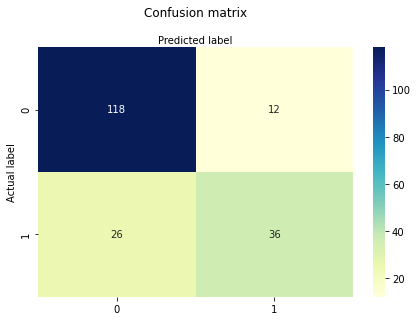

In [180]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**PLA**

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix 
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [182]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()


In [183]:
dataset = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
dataset["Class"] = breast_cancer_dataset.target
dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [184]:
dataset.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [185]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [186]:
dataset.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Class                      0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

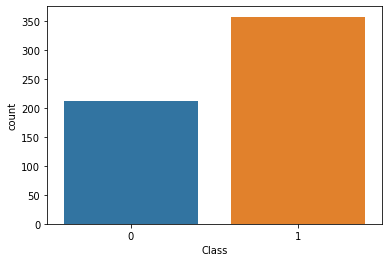

In [187]:
sns.countplot(x = dataset["Class"])


In [188]:
Y = dataset["Class"].values
X = dataset.iloc[:, :-1].values

In [189]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = np.column_stack((X,np.ones(X.shape[0])))
print("X shape:- ", X.shape)
print("Y shape:- ", Y.shape)

X shape:-  (569, 31)
Y shape:-  (569,)


In [190]:
class PLA :
  def __init__(self, iteration , learning_rate):
    self.iterations = iteration
    self.learning_rate = learning_rate 
    self.weights = None
    
  def activation_function(self,X):
    return np.where(X>=0, 1, 0)

  def predict(self, X):
    output = np.dot(X,self.weights)
    prediction = self.activation_function(output)
    return prediction

  def fit(self, X, Y):
    self.m , self.n = X.shape
    self.weights = np.random.uniform(self.n)
    y_ = np.array([1 if i>0 else 0 for i in Y])
    #looping 
    for _ in range(self.iterations):
      for idx, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights)
        y_predicted = self.activation_function(linear_output)
                
        # Perceptron update rule
        update = self.learning_rate * (y_[idx] - y_predicted)
        self.weights += update * x_i

In [191]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=0)
model = PLA(1000, 0.001)
model.fit(x_train, y_train)

In [192]:
y_pred = model.predict(x_test)
print("accuracy:- ",accuracy_score(y_test,y_pred))

accuracy:-  0.9707602339181286


<AxesSubplot:>

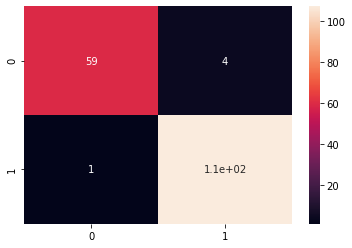

In [193]:
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot= True)

In [194]:
#Using SKLEARN
from sklearn.linear_model import Perceptron
model_sklearn = Perceptron()
model_sklearn.fit(x_train, y_train)
y_pred_sklearn = model_sklearn.predict(x_test)
print("accuracy:- ",accuracy_score(y_test,y_pred_sklearn))
print("cross_val_score :-", cross_val_score(model_sklearn, X, Y, cv = 10, scoring = 'accuracy'))

accuracy:-  0.9590643274853801
cross_val_score :- [0.94736842 0.98245614 0.96491228 0.94736842 0.96491228 0.98245614
 0.9122807  1.         1.         0.91071429]


<AxesSubplot:>

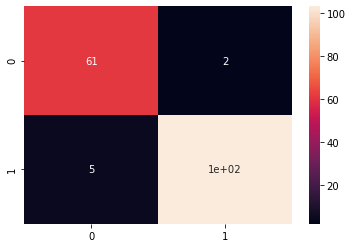

In [195]:
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_sklearn, annot= True)

E+01 means moving the decimal point one digit to the right, E + 02 = hàng trăm. 

# Luyện tập

## Data set

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division, print_function, unicode_literals
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix 
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [197]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()


In [198]:
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [199]:
dataset = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
dataset["Class"] = breast_cancer_dataset.target
dataset.columns.to_list()
dataset.head()
dataset2 = dataset.drop(columns=['Class'], inplace=False)
dataset2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [200]:
dataset2.columns.to_list()

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

## Logistic regression

In [201]:
X = dataset2

In [202]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [203]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [204]:
y = dataset.Class

In [205]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

lr = logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
print(y_pred)accuracy_score

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [206]:
accuracy_score(y_test, y_pred)

0.951048951048951

## Liner regression

In [207]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [208]:
X = dataset2

In [218]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = np.array(X_scaled)
#X_scaled = X_scaled.reshape(-1,1)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [214]:
y = dataset.Class
y = np.array(y)
#y = y.reshape(-1,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [219]:
# Split the data into training/testing sets
X_train = X_scaled[:-20]
X_test = X_scaled[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [220]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [221]:
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [224]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [ 0.66711997 -0.0225048  -0.44286    -0.13785543 -0.00626988  0.23402404
 -0.14747375 -0.07631923 -0.00307617 -0.00332925 -0.119422    0.00684069
  0.05611412  0.03258226 -0.04787048  0.01102717  0.12531381 -0.08382554
 -0.01200717  0.01177695 -0.92128069 -0.04843357  0.01118849  0.61935777
 -0.00986212 -0.03011548 -0.08299131 -0.00444595 -0.0342846  -0.07153075]
Mean squared error: 0.07
Coefficient of determination: 0.69


## logistic_sigmoid_regression: là bài toán phân loại 2 đại lượng (features), nếu dùng trên 2 đại lượng sẽ khó ra kết quả chính xác

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X

array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [ ]:
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)

C:\Users\dk201\AppData\Local\Temp/ipykernel_8664/449343092.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
print(w[-1])

[[-1.23415193e+01]
 [ 3.35124054e+00]
 [-1.49432993e+01]
 [-1.80629623e+01]
 [ 6.85023095e+00]
 [-2.47215494e+01]
 [ 6.56453546e+00]
 [-5.22086993e+00]
 [ 4.63503605e+00]
 [ 2.01812771e+00]
 [ 1.31919022e+01]
 [ 1.49672951e+00]
 [ 6.72560505e+00]
 [-2.82722822e+01]
 [-1.48074654e+01]
 [-9.75823900e-01]
 [-2.07070718e+00]
 [ 9.67603073e+00]
 [ 6.74913896e+00]
 [-6.74284865e+00]
 [ 7.97176876e-02]
 [ 1.08233688e+00]
 [ 2.99662898e+00]
 [-1.76818041e+00]
 [-2.69757701e+00]
 [ 1.35635946e+01]
 [-3.71729997e+00]
 [ 7.24071508e+00]
 [-1.43287563e+01]
 [ 5.31286426e+00]
 [-1.02230347e+01]
 [-9.95226362e+00]
 [ 1.45522174e+01]
 [-3.56310966e+00]
 [-1.72726662e+01]
 [ 5.28266382e+00]
 [-4.21415665e+00]
 [-1.43675101e+00]
 [-6.05195244e+00]
 [-2.09717100e+01]
 [-8.66568569e-01]
 [ 3.88417399e+00]
 [ 1.42764577e+01]
 [-1.24861432e+01]
 [ 9.70304710e+00]
 [ 7.03521149e+00]
 [-1.22722990e+01]
 [ 5.72701288e+00]
 [ 7.51802060e+00]
 [ 4.80763941e+00]
 [ 2.90461927e+00]
 [-2.97805661e+00]
 [ 1.9796551

In [ ]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  8.62821077e-066 1.15580269e-116 1.70807838e-167 2.63063647e-095
  3.02753142e-120 1.35121712e-039 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 7.84194488e-011 7.96245500e-034
  1.47197542e-045 1.59557585e-019 1.36926538e-021 3.66861088e-009
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.21167922e-076 5.79530629e-216 0.00000000e+000 3.32230122e-141
  4.67232133e-161 6.79492183e-049]]


C:\Users\dk201\AppData\Local\Temp/ipykernel_8664/449343092.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
